In [1]:
from interest.sentiment import SentimentAnalyser

[nltk_data] Downloading package punkt to /Users/nadin001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
analyzer = SentimentAnalyser('../data/negative_words_gpt.txt', '../data/positive_words_gpt.txt', '../data/merged/combined_df.csv', '../models/pretrained/Dutch_CoNLL17_corpus/model.bin')


Calculating word vectors...: 100%|██████████████████████████████████████████████████████| 3141/3141 [00:01<00:00, 1853.15article/s]


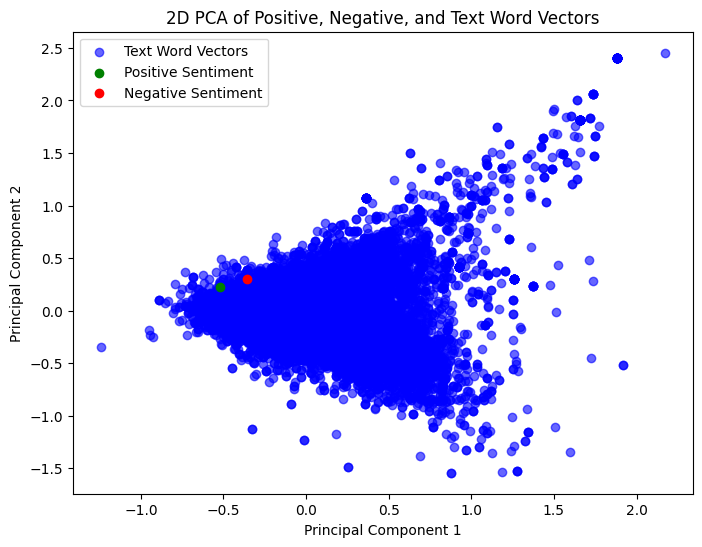

In [3]:
negative_sentiment_word_vector = analyzer.negative_words_to_word_vectors()
positive_sentiment_word_vector = analyzer.positive_words_to_word_vectors()
articles_word_vectors = analyzer.text_to_word_vectors()
analyzer.plot_word_vectors(negative_sentiment_word_vector, positive_sentiment_word_vector, articles_word_vectors)


Classification Report:
              precision    recall  f1-score   support

    positive       0.68      0.04      0.08      1093
    negative       0.31      0.67      0.42       946
     neutral       0.48      0.44      0.46      1102

    accuracy                           0.37      3141
   macro avg       0.49      0.38      0.32      3141
weighted avg       0.50      0.37      0.32      3141

Confusion Matrix:
[[ 46 825 222]
 [ 12 630 304]
 [ 10 606 486]]


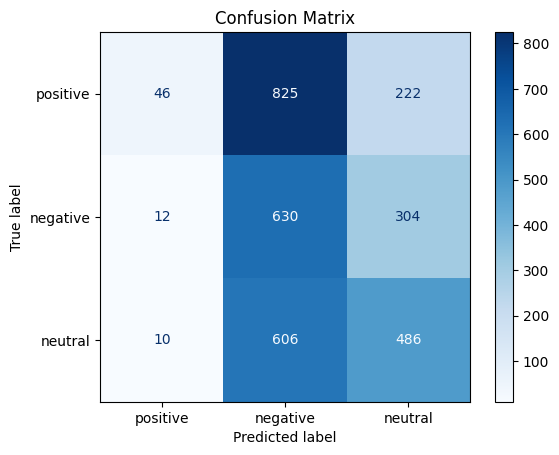

{'accuracy': 0.3699458771092009,
 'precision': 0.4959484248620026,
 'recall': 0.3699458771092009,
 'f1_score': 0.31508986112535986,
 'confusion_matrix': array([[ 46, 825, 222],
        [ 12, 630, 304],
        [ 10, 606, 486]])}

In [4]:
article_sentiments = analyzer.calculate_article_sentiment(articles_word_vectors, negative_sentiment_word_vector, positive_sentiment_word_vector, neutral_threshold=0.05)
analyzer.evaluate_sentiment_predictions(analyzer.sentiment_labels, article_sentiments)
